#Problem Statement:
#Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.


Machine Learning Workflow:
1. Extract Features

a. Features and target should not have any null values
b. Features should be numeric (handle categorical values)
c. Features should be of the type array/ dataframe
d. Features should be having some rows and columns
e. Features should be on the same scale
2. Split the dataset into training and testing datasets

3. Train the model on the training set

a. Import the necessary library
b. Instantiate an object
c. .fit() on training data
4. Test/ Evaluate the model on the testing set

a. .predict() on test data
b. Evaluate the performance (Compare the Actual vs. Predicted values)
c. If performance is not upto the mark, use performance optimization (Dimensionality Reduction, HPO, Change the ML algorithm)

Importing Libraries

In [3]:
import numpy as np
import pandas as pd

# Read Dataset

In [4]:
df=pd.read_csv(r"C:\Users\Aj\Downloads\Data sets decodr\housing.csv")

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# Check Size of data

In [7]:
df.shape

(545, 13)

# Check various datatypes in data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#  Check Statistical info of data

In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Check missing values

In [10]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
df["mainroad"].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [13]:
df["guestroom"].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [14]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
# Now we have a clean dataframe which is ready for model building.


# Visualising the data

Visualising Numeric Variables

In [15]:
#Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns

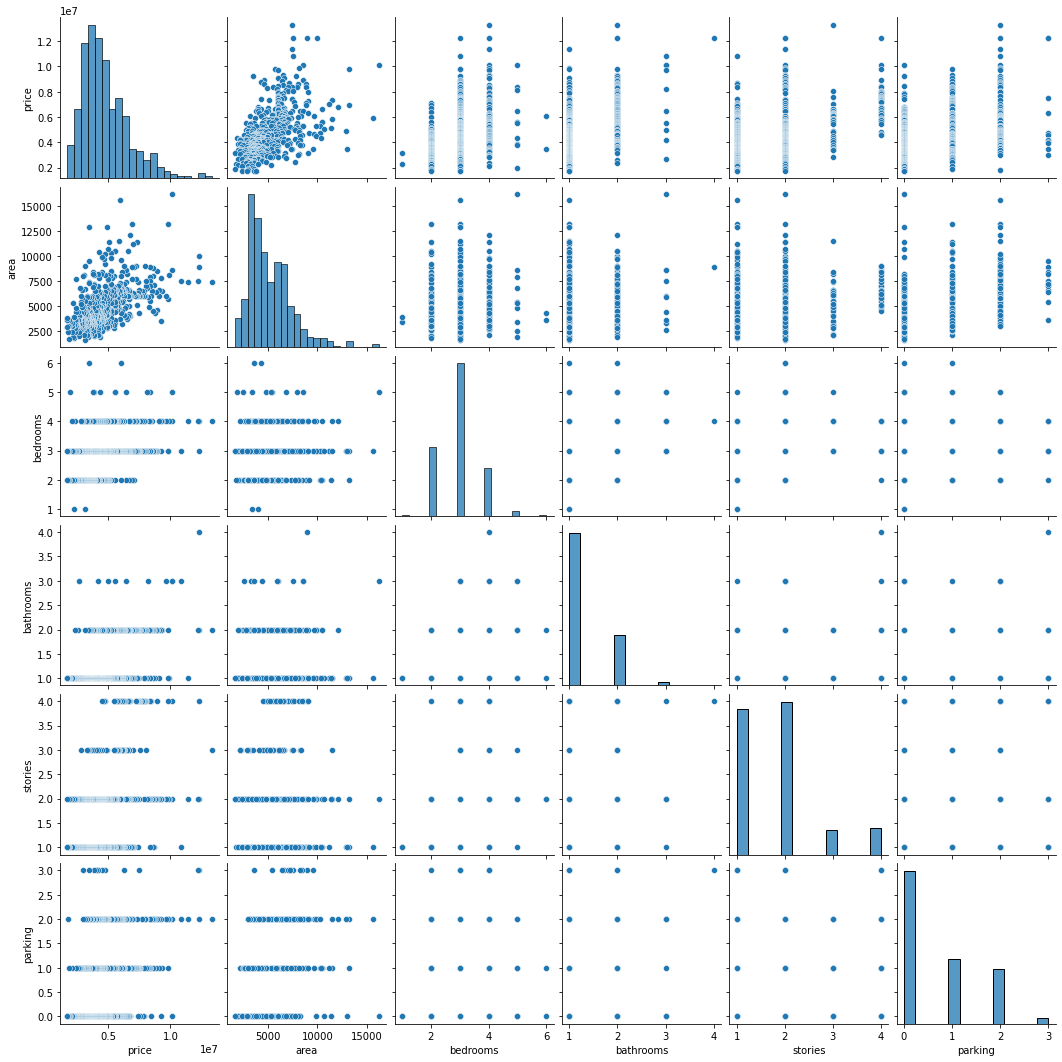

In [16]:
sns.pairplot(df)
plt.show()

Visualising Categorical Variables

<AxesSubplot:>

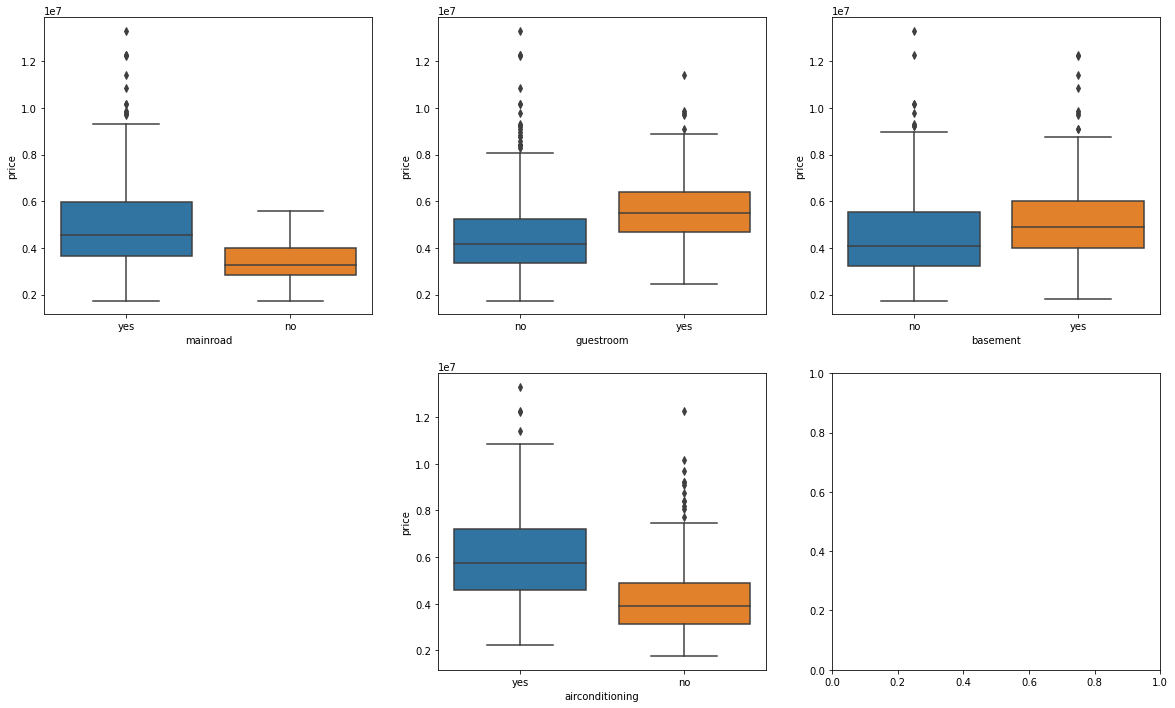

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)

#  Apply label encoding to the  clean dataframe

In [18]:
from sklearn import preprocessing


In [19]:
#encode categorical variables using label encoder
#select all categorical variables
df_categorical =df.select_dtypes(include=['object'])
df_categorical.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [20]:
#apply label encoder to df_categorical

le=preprocessing.LabelEncoder()
df_categorical=df_categorical.apply(le.fit_transform)
df_categorical.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,0
4,1,1,1,0,1,0,0


In [21]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)


In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no


In [23]:
# List of variables to map

varlist =  ['mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning','prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


# Splitting the data into train and test (70/30)

In [25]:
labels = df.pop('hotwaterheating')

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, labels, train_size = 0.7, test_size = 0.3, random_state = 100)

# Build a decision tree classifier & also print the confusion matrix

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
#Import descision tree classifier from sk learn library
from sklearn.tree import DecisionTreeClassifier

#Fitting the decession tree with default hyperparameters,apart from 
#max_depth which is 5 so that we can plot and read the tree

dt_default=DecisionTreeClassifier(max_depth=15)



In [29]:
# Fiting on Train data
dt_default.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15)

In [30]:
x_train.shape, x_test.shape

((381, 11), (164, 11))

In [31]:
#lets check the evaluation metrics of our default model

#Importing classification report and confusion matrix from sklearn metrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree

#Making predictions
y_pred_default=dt_default.predict(x_test)

#Printing classification report
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       159
           1       0.00      0.00      0.00         5

    accuracy                           0.91       164
   macro avg       0.48      0.47      0.48       164
weighted avg       0.94      0.91      0.93       164



In [32]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[150   9]
 [  5   0]]
0.9146341463414634


# Gaussian Naive Bayes:

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
GNB_model = GaussianNB()

In [35]:
GNB_model.fit(x_train, y_train)

GaussianNB()

In [36]:
#Printing classification report
print(classification_report(y_test,GNB_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.36      0.53       159
           1       0.04      0.80      0.07         5

    accuracy                           0.37       164
   macro avg       0.51      0.58      0.30       164
weighted avg       0.95      0.37      0.51       164

